# Amon and Robertson 2023
# Lensing data for KiDS-1000, DES Y3 and HSC Y1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from   matplotlib.pyplot import *
import sys
import pylab as pl
import numpy as np
from   copy import copy
import pandas
from astropy.io import fits
from astropy.table import Table, Column
import os.path
from numpy import genfromtxt
from math import *
from astropy.coordinates import SkyCoord
import pandas as pd  

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = "STIXGeneral"
plt.rcParams['font.size'] = 25
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rc("text",usetex=True)
plt.rc("font",family="serif")
plt.rc("font",serif="STIXGeneral")

In [5]:
dir='Amon&RobFiles/'  

#DESY3KiDS1000_com_sys_mag signals include data systematic errors, a magnitude correction, 
#and are already converted to the units quotes. 
#For the invidual surveys, this code folds in systematic errors and converts the units


kidssys=0.015
dessys=[0.01, 0.015, 0.02, 0.025]
hscsys=0.06
zls=[0.240,0.364,0.496,0.592]

# $\Delta\Sigma(R)$ 

0 LOWZ_0.15_0.31 K1000
1 LOWZ_0.15_0.31 DESY3
2 LOWZ_0.15_0.31 DESY3K1000
3 LOWZ_0.15_0.31 HSC
0 LOWZ_0.31_0.43 K1000
1 LOWZ_0.31_0.43 DESY3
2 LOWZ_0.31_0.43 DESY3K1000
3 LOWZ_0.31_0.43 HSC
0 CMASS_0.43_0.54 K1000
1 CMASS_0.43_0.54 DESY3
2 CMASS_0.43_0.54 DESY3K1000
3 CMASS_0.43_0.54 HSC
0 CMASS_0.54_0.7 K1000
1 CMASS_0.54_0.7 DESY3
2 CMASS_0.54_0.7 DESY3K1000
3 CMASS_0.54_0.7 HSC


/var/folders/j9/470bxrp950g004ytm11ck0d40000gn/T/ipykernel_90684/3215406455.py:83: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)
/var/folders/j9/470bxrp950g004ytm11ck0d40000gn/T/ipykernel_90684/3215406455.py:85: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)


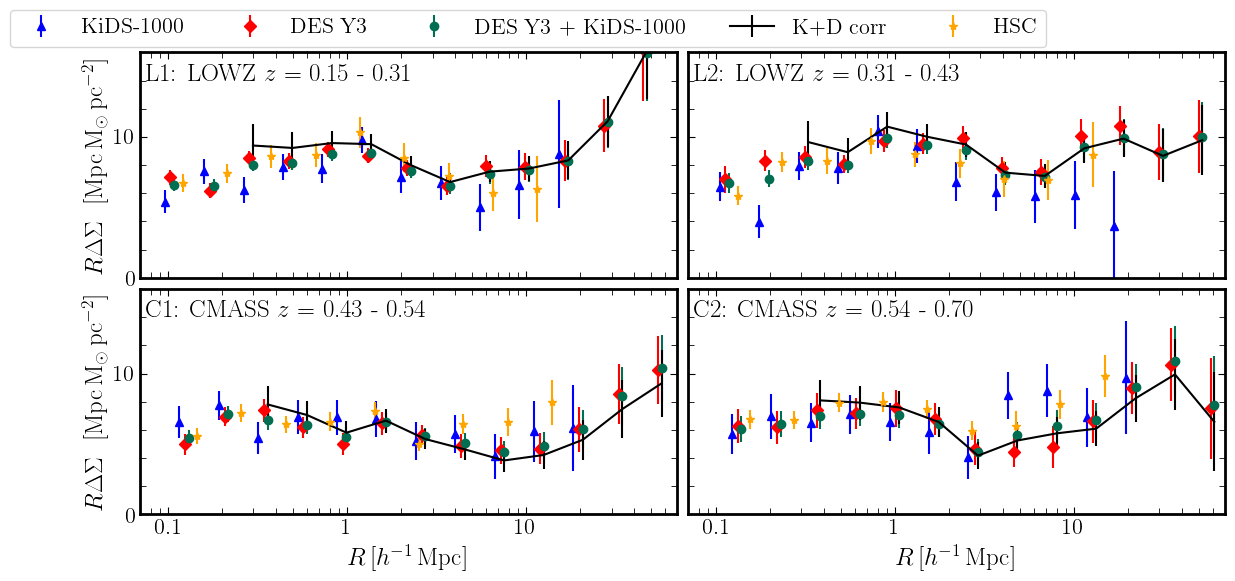

In [7]:
Fig, axes = plt.subplots(2,2,figsize=(14,6))
plt.subplots_adjust(wspace=0.02, hspace=0.05)

j=0
experiments = ["K1000",'DESY3','DESY3K1000',"HSC"] 
weight_type = "wtot"
samples = ["LOWZ_0.15_0.31","LOWZ_0.31_0.43","CMASS_0.43_0.54","CMASS_0.54_0.7"]
labels = ["KiDS-1000",'DES Y3','DES Y3 + KiDS-1000','HSC'] 
colours=['blue','red','#016e51','orange']
markers=['^','D','o','*','s','D']
strings = [r"L1: LOWZ $z$ = 0.15 - 0.31",r"L2: LOWZ $z$ = 0.31 - 0.43",r"C1: CMASS $z$ = 0.43 - 0.54",r"C2: CMASS $z$ = 0.54 - 0.70"]

          
for ax, sample,zl in zip(axes.flatten(), samples,zls ):
    for i,experiment in enumerate(experiments):
        print(i,sample,experiment)
        if experiment=='DESY3':
            name=dir+'ForDS/DESY3/LWB_lowz+cmass-100Mpc_boost_rand-subtr_zbin%d_combined_v6_Corr_profile.dat' %j
        elif experiment=='K1000':
            name = dir+'ForDS/KiDS1000/K1000_'+sample+'_'+str(weight_type)+'_with_boost_randsub_biascor.dat'
        elif experiment=='DESY3K1000':
            name = dir+'ForDS/DESY3KiDS1000/DESY3KiDS1000_'+sample+'_'+str(weight_type)+'_opt1.dat'
        else:
            name = dir+'ForDS/HSCY1/'+experiment+'_'+sample+'_'+str(weight_type)+'.dat'
        
        data=np.loadtxt(name)
        data[:,0]=data[:,0]*(1+zl)*0.7 #convert units 
        data[:,1]=data[:,1]/(1+zl)**2/0.7 #convert units 
        data[:,2]=data[:,2]/(1+zl)**2/0.7 #convert units 

        if experiment=='K1000':
            nbin=12
            kids=data[:,1]
            Rkids=data[:,0]
            syserr=np.zeros(len(data[:,1]))
            newerror=np.zeros(len(data[:,1]))                
            syserr=data[:,1]*kidssys
            newerror=np.sqrt(syserr**2+data[:,2]**2)
            kidserr=newerror
            ax.errorbar(data[1:nbin,0]+(data[1:nbin,0]*0.06*i),data[1:nbin,0]*data[1:nbin,1], yerr=data[1:nbin,0]*newerror[1:nbin],color=colours[i],marker=markers[i],label=labels[i],linestyle ='')       

        elif experiment=="DESY3":
            nbin=14 
            des=data[:,1]
            Rdes=data[:,0]
            syserr=np.zeros(len(data[:,1]))
            newerror=np.zeros(len(data[:,1]))                
            syserr=data[:,1]*dessys[j]
            newerror=np.sqrt(syserr**2+data[:,2]**2)
            deserr=newerror
            ax.errorbar(data[1:nbin,0]+(data[1:nbin,0]*0.06*i),data[1:nbin,0]*data[1:nbin,1], yerr=data[1:nbin,0]*newerror[1:nbin],color=colours[i],marker=markers[i],label=labels[i],linestyle ='')       

        elif experiment=='HSC':
            nbin=14 
            syserr=np.zeros(len(data[:,1]))
            newerror=np.zeros(len(data[:,1]))                
            syserr=data[:,1]*hscsys
            newerror=np.sqrt(syserr**2+data[:,2]**2)
            ax.errorbar(data[1:nbin,0]+(data[1:nbin,0]*0.06*i),data[1:nbin,0]*data[1:nbin,1], yerr=data[1:nbin,0]*newerror[1:nbin],color=colours[i],marker=markers[i],label=labels[i],linestyle ='')       
        else:
            nbin=14 
            #print(Rkids,Rdes)
            Rbin=(Rkids+Rdes)/2
            newsignal=np.zeros(len(data[:,1]))
            newerror=np.zeros(len(data[:,1]))
            newsignal=((kids/kidserr**2) + (des/deserr**2) ) / ((1/kidserr**2) + (1/deserr**2) )
            newerror= 1 / np.sqrt((1/kidserr**2) + (1/deserr**2) )
            #filen= dir+'DESY3KiDS1000_"+sample+"_"+str(weight_type)+"_opt1_sys.dat"
            #np.savetxt(filen,np.column_stack((Rbin,newsignal,newerror)))
            ax.errorbar(Rbin[1:nbin]+(Rbin[1:nbin]*0.06*i),Rbin[1:nbin]*newsignal[1:nbin], yerr=Rbin[1:nbin]*newerror[1:nbin],color=colours[i],marker=markers[i],label=labels[i],linestyle ='')       
            
            #this is the real corrected signal, actually used
            data=np.loadtxt(dir+'ForDS/DESY3KiDS1000_com_sys_mag/DESY3KiDS1000_'+sample+'_wtot_opt1_sys_mag_comh_modelsys.dat')
            ax.errorbar(data[1:nbin,0]+(data[1:nbin,0]*0.06*i),data[1:nbin,0]*data[1:nbin,1], yerr=data[1:nbin,0]*data[1:nbin,2],color='k',label="K+D corr",linestyle ='-')   

        i+=1
        ax.set_ylim(0,16)
        ax.set_xscale('log')
        ax.set_xlim(xmin=0.07,xmax=70)
        ax.set_xbound(lower=0.07, upper=70)
        ax.tick_params(which='minor', length=4, color='k')
        for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(16) 
        for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(16)
                
        x=data[:,0]
        formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) 
        ax.xaxis.set_major_formatter(formatter)
    ax.text(0.075, 14., strings[j], fontsize=18)
    j+=1
plt.tick_params(axis='y', which='minor')
axes[0,1].set_yticklabels([])
axes[1,1].set_yticklabels([])
axes[0,1].set_xticklabels([])
axes[0,0].set_xticklabels([])


handles, labels = axes[0,0].get_legend_handles_labels()
Fig.legend(handles, labels,bbox_to_anchor=(0.78, 0.97), fontsize=16,ncol=5)#,handletextpad=0.1)
axes[1,0].set_ylabel(r'$R \Delta \Sigma \,\,\,\, [\rm{Mpc} \, M_\odot \, \rm{pc^{-2}}]$', fontsize=18)
axes[0,0].set_ylabel(r'$R \Delta \Sigma \,\,\,\, [\rm{Mpc} \,  M_\odot \, \rm{pc^{-2}}]$', fontsize=18)
axes[1,0].set_xlabel(r'$R \, [h^{-1} \, \mathrm{Mpc}]$', fontsize=18)
axes[1,1].set_xlabel(r'$R \, [h^{-1} \, \mathrm{Mpc}]$', fontsize=18)
plt.show() 

# $N(z)$ 

/var/folders/j9/470bxrp950g004ytm11ck0d40000gn/T/ipykernel_90684/3763673580.py:28: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)
/var/folders/j9/470bxrp950g004ytm11ck0d40000gn/T/ipykernel_90684/3763673580.py:30: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(16)


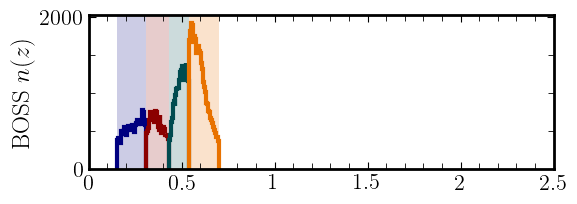

In [8]:
colors = ['#12239e','#e13102','#016e51','#ffa500','k']
colors2=['navy','darkred','#004B50','#E87200']

fig = plt.figure(figsize=(6.,8))
ax = fig.add_subplot(411)
BOSS = fits.getdata(dir+'ForNzs/DES_LOWZ_lensJK.fits')
lowzl=BOSS[(BOSS['Z']<0.31) & (BOSS['Z']>0.15)]
lowzh=BOSS[(BOSS['Z']>0.31) & (BOSS['Z']<0.43)]

BOSS = fits.getdata(dir+'ForNzs/DES_CMASS_lensJK.fits')
cmassl=BOSS[(BOSS['Z']>0.43) & (BOSS['Z']<0.54)]
cmassh=BOSS[(BOSS['Z']>0.54) & (BOSS['Z']<0.7)]

bins=int(30)
ax.hist(lowzl['Z'],bins=bins, color = colors2[0], histtype='step', linewidth=3, label=r'LOWZ $0.15<z<0.31$')
ax.hist(lowzh['Z'],bins=bins, color = colors2[1], histtype='step', linewidth=3,  label=r'LOWZ $0.31<z<0.43$')
ax.hist(cmassl['Z'],bins=bins, color = colors2[2], histtype='step', linewidth=3,  label=r'CMASS $0.43<z<0.54$')
ax.hist(cmassh['Z'],bins=bins, color = colors2[3], histtype='step', linewidth=3,  label=r'CMASS $0.54<z<0.70$')
ax.set_xlim((0,2.5))
ax.set_ylabel(r"BOSS $n(z)$", fontsize=18)

ax.axvspan(0.15,0.31, facecolor=colors2[0], alpha=0.2)
ax.axvspan(0.31,0.43, facecolor=colors2[1], alpha=0.2)
ax.axvspan(0.43,0.54, facecolor=colors2[2], alpha=0.2)
ax.axvspan(0.54,0.7, facecolor=colors2[3], alpha=0.2)
ax.tick_params(which='minor', length=4, color='k')
for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16) 
for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
from matplotlib.ticker import FuncFormatter
x=lowzl['Z'] #data[:,0]
formatter = FuncFormatter(lambda x, _: '{:.16g}'.format(x)) # https://stackoverflow.com/a/49306588/3904031
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0,0.5,1.0,1.5,2.0,2.5])
plt.subplots_adjust(hspace=0,wspace=0)
plt.show()  